<a href="https://colab.research.google.com/github/magobbing/magobbing.github.io/blob/master/2025_03_18_capstone_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 1
주사위 두 개를 굴려서 나온 눈의 수를 사용해서 두 자리 숫자를 크게 만드는 사람이 이기는 게임이다. 주사위를 처음 굴려서 나온 눈의 수를 10의 자리와 1의 자리 중 어느 곳에 사용할 지 먼저 결정해야 한다. 그런 다음 두 번째로 주사위를 굴려서 나온 눈의 수는 자동으로 남은 자리의 숫자로 사용된다.

예를 들어, 첫 번째 주사위가 3인데 10의 자리로 결정했고, 두 번째 6이 나왔다면 결과는 36이 된다.  

어떤 전략을 사용해야 게임에 이길 가능성이 가장 클까?

1. 위의 "two_dice.csv" 파일을 다운받아 최선이라고 선택한 전략의 총점수를 구하는 R 또는 파이썬 코드를 작성하여 제출하라.
  

2. 최선의 전략일 때 확률분포를 구하고 그래프로 그려라.

3. 최선의 전략에서 기대 점수를 구하라.

In [ ]:
# <r 코드>
library(dplyr)
library(ggplot2)
url <- "/content/two_dice.csv"

df<-read.csv(url)

df <- df %>%
  mutate(
    number = ifelse(dice1 >= 4, dice1 * 10 + dice2, dice2 * 10 + dice1)
  )

# 총점수
total_score <- sum(df$number)
print(total_score)

# 평균
mean_score <- mean(df$number)
print(mean_score)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 45241257
[1] 45.24126


- 총점수 : 45241257
- 평균 : 45.24126

# 최선의 전략:
- 첫 번째 주사위가 4 이상이면 10의 자리에 배치
(즉, 4, 5, 6일 경우)
- 첫 번째 주사위가 3 이하이면 1의 자리에 배치
(즉, 1, 2, 3일 경우)

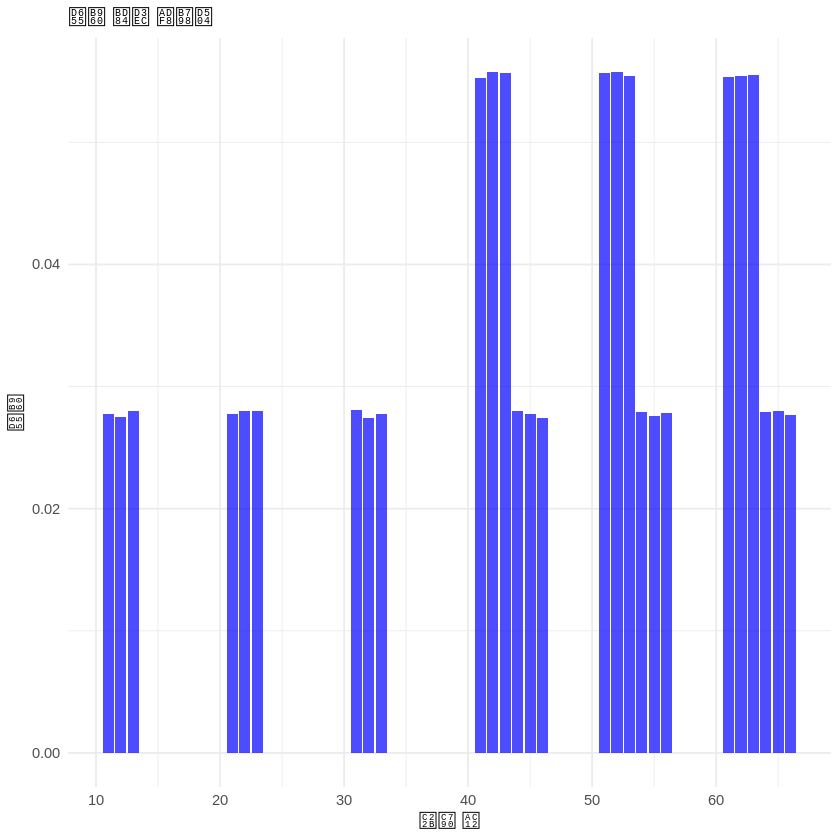

In [ ]:
# 확률 분포 계산
prob_dist <- df %>%
  count(number) %>%
  mutate(probability = n / sum(n))

# 시각화
ggplot(prob_dist, aes(x = number, y = probability)) +
  geom_bar(stat = "identity", fill = "blue", alpha = 0.7) +
  labs(title = "확률 분포 그래프", x = "숫자 값", y = "확률")+
  theme_minimal()

## 직접 기대값 계산
첫 번째 주사위가 4,5,6인 경우 (확률 50%)
가능한 경우:

- X = 4,5,6 (각각 확률 1/6씩)
- Y = 1~6 (각각 확률 1/6씩)
- 기댓값_1 = sum over X and Y of [(10×X + Y) × P(X) × P(Y)]

## 계산:

- E[X] = (4+5+6) / 3 = 5
- E[Y] = (1+2+3+4+5+6)/6 = 3.5
- 기댓값_1 = 10 × 5 + 3.5 = 53.5

그리고 이 경우의 확률은 3/6 = 0.5

 - 기댓값 $$0.5×53.5+0.5×37=26.75+18.5=45.25$$

# 문제 2

주사위 3개를 굴려서 나온 눈의 수를 사용해서 세자리 숫자를 가장 크게 만드는 사람이 이기는 게임이다.
주사위를 처음 굴려서 나온 눈의 수를 세자리 숫자에서 어느 곳에 사용할 지 먼저 결정한다. 그런 다음 두 번째로 굴린 주사위에서 나온 눈의 수는 남은 두자리의 숫자 중 하나로 결정한다. 세 번째 나온 주사위 눈수는 자동으로 남은 숫자로 사용된다.

예를 들어, 첫 번째 주사위가 3인데 10의 자리로 결정했고, 두 번째 6이 나와 100의 자리 숫자에 사용하고, 세 번째 주사위 눈수가 1이면 결과는 631이 된다.

어떤 전략이 최선의 전략인가?

1. 위의 "three_dice.csv" 파일을 다운받아 선택한 전략의 총점수를 구하는 R 또는 파이썬 코드를 작성하여 제출하라.

2. 최선의 전략일 때 확률분포를 구하고 그래프로 그려라.

3. 최선의 전략에서 이론적인 기댓값을 구하라.

In [ ]:
url <- "/content/three_dice.csv"
df2 <- read.csv(url)

In [ ]:
# case_when 함수 사용

# 여러 경우의 수를 비교하기 위해 dice2 조건을 변수화
df2 <- df2 %>%
  mutate(
    pos1 = ifelse(dice1 >= 5, 100, ifelse(dice1 <= 2, 1, 10)),

    # dice2의 조건을 변수화해서 여러 경우 비교 가능
    pos2_4 = case_when(
      pos1 == 100 & dice2 >= 4 ~ 10,
      pos1 == 100 ~ 1,
      pos1 == 10 & dice2 >= 4 ~ 100,
      pos1 == 10 ~ 1,
      dice2 >= 4 ~ 100,
      TRUE ~ 10
    ),

    pos2_5 = case_when(
      pos1 == 100 & dice2 >= 5 ~ 10,
      pos1 == 100 ~ 1,
      pos1 == 10 & dice2 >= 5 ~ 100,
      pos1 == 10 ~ 1,
      dice2 >= 5 ~ 100,
      TRUE ~ 10
    ),

    # dice3은 동일한 로직 적용
    pos3_4 = 100 + 10 + 1 - pos1 - pos2_4,
    pos3_5 = 100 + 10 + 1 - pos1 - pos2_5,

    # 최종 숫자 계산
    number_4 = (dice1 * pos1) + (dice2 * pos2_4) + (dice3 * pos3_4),
    number_5 = (dice1 * pos1) + (dice2 * pos2_5) + (dice3 * pos3_5)
  )

# 어떤 조건이 더 높은 평균이 나오는지 확인
## dice2_4일 때 더 값이 높음
df2 %>%
  summarise(
    mean_4 = mean(number_4),
    mean_5 = mean(number_5)
  )

df2 %>%
  summarise(
    sum_4 = sum(number_4),
    sum_5 = sum(number_5)
  )

mean_4,mean_5
<dbl>,<dbl>
503.8952,498.4394


sum_4,sum_5
<dbl>,<dbl>
503895228,498439428


- 총점수 : 503895228
- 평균 : 503.8952

# 최선의 전략 :


number_4,count,prob
<dbl>,<int>,<dbl>
111,4622,0.004622
112,4677,0.004677
121,4635,0.004635
122,4505,0.004505
131,9229,0.009229
132,9164,0.009164


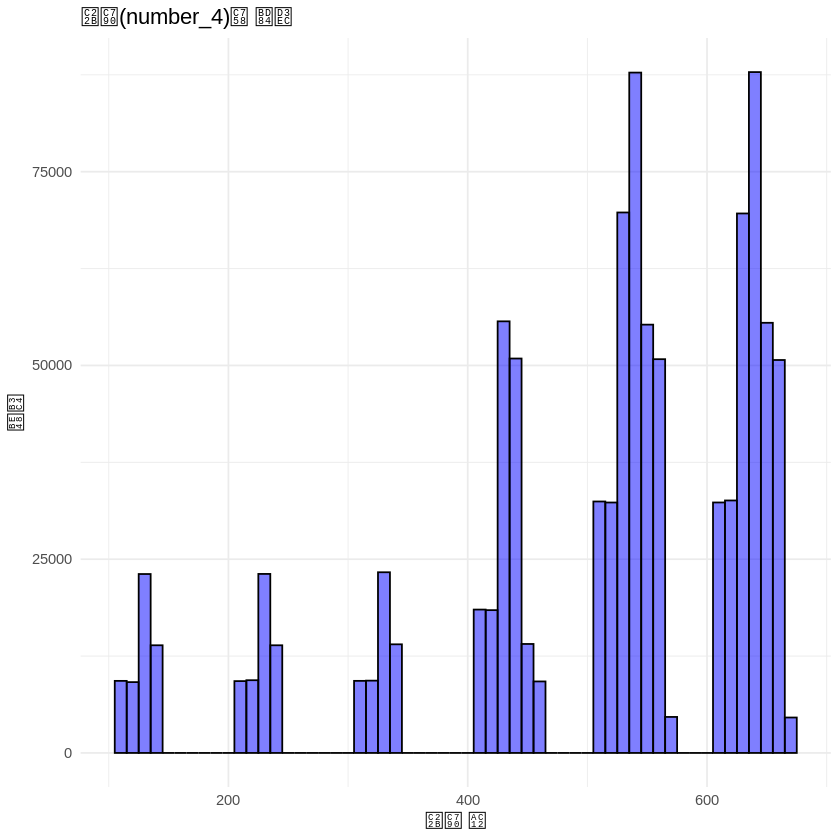

In [ ]:
# dice2_4를 최선의 전략으로 채택하고 확률분포 구하기
prob_dist <- df2 %>%
  group_by(number_4) %>%
  summarise(count = n()) %>%
  mutate(prob = count / sum(count)) # 확률 계산

head(prob_dist)

# 히스토그램 시각화
ggplot(df2, aes(x = number_4)) +
  geom_histogram(binwidth = 10, fill = "blue", alpha = 0.5, color = "black") +
  labs(title = "숫자(number_4)의 분포", x = "숫자 값", y = "빈도") +
  theme_minimal()